In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

color = sns.color_palette()

In [2]:
df = pd.read_csv('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone 3\Modeling1.csv')
df.head()

,Unnamed: 0,Issue,Consumer complaint narrative,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,22,Problem when making payments,I was shocked when I reviewed my credit report...,JPMORGAN CHASE & CO.,MS,Consent provided,Web,2019-02-27,Closed with explanation,Yes,NaN
1,102,Getting a credit card,I have been in USA two times as XXXX student (...,DISCOVER BANK,PA,Consent provided,Web,2019-02-24,Closed with non-monetary relief,Yes,NaN
2,175,Problem with a purchase shown on your statement,"On XX/XX/XXXX, Bank of America mailed out a ca...","BANK OF AMERICA, NATIONAL ASSOCIATION",CA,Consent provided,Web,2019-01-10,Closed with monetary relief,Yes,NaN
3,216,Closing your account,I was using my chase credit card like a regula...,JPMORGAN CHASE & CO.,NJ,Consent provided,Web,2019-06-27,Closed with explanation,Yes,NaN
4,310,Problem with a purchase shown on your statement,On a letter dated XX/XX/XXXX Chase states they...,JPMORGAN CHASE & CO.,TX,Consent provided,Web,2018-12-31,Closed with explanation,Yes,NaN


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54687 entries, 0 to 54686
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Issue                         54687 non-null  object
 1   Consumer complaint narrative  54687 non-null  object
 2   Company                       54687 non-null  object
 3   State                         54431 non-null  object
 4   Consumer consent provided?    54687 non-null  object
 5   Submitted via                 54687 non-null  object
 6   Date sent to company          54687 non-null  object
 7   Company response to consumer  54687 non-null  object
 8   Timely response?              54687 non-null  object
 9   Consumer disputed?            18838 non-null  object
dtypes: object(10)
memory usage: 4.2+ MB


In [4]:
df1 = df[df['Consumer disputed?'] == 'No']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14582 entries, 35849 to 54686
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Issue                         14582 non-null  object
 1   Consumer complaint narrative  14582 non-null  object
 2   Company                       14582 non-null  object
 3   State                         14541 non-null  object
 4   Consumer consent provided?    14582 non-null  object
 5   Submitted via                 14582 non-null  object
 6   Date sent to company          14582 non-null  object
 7   Company response to consumer  14582 non-null  object
 8   Timely response?              14582 non-null  object
 9   Consumer disputed?            14582 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


In [5]:
df1['Company response to consumer'].value_counts()

Closed with explanation            8780
Closed with monetary relief        3827
Closed with non-monetary relief    1869
Closed                               81
Untimely response                    25
Name: Company response to consumer, dtype: int64

In [6]:
df2 = df1[~df1['Company response to consumer'].isin(['Closed', 'Untimely response'])]
df2['Company response to consumer'].value_counts()

Closed with explanation            8780
Closed with monetary relief        3827
Closed with non-monetary relief    1869
Name: Company response to consumer, dtype: int64

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14476 entries, 35849 to 54686
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Issue                         14476 non-null  object
 1   Consumer complaint narrative  14476 non-null  object
 2   Company                       14476 non-null  object
 3   State                         14436 non-null  object
 4   Consumer consent provided?    14476 non-null  object
 5   Submitted via                 14476 non-null  object
 6   Date sent to company          14476 non-null  object
 7   Company response to consumer  14476 non-null  object
 8   Timely response?              14476 non-null  object
 9   Consumer disputed?            14476 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


In [8]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from io import StringIO
import os
import string
#import gensim
#from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')   

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Converting text data to lower case

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54687 entries, 0 to 54686
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Issue                         54687 non-null  object
 1   Consumer complaint narrative  54687 non-null  object
 2   Company                       54687 non-null  object
 3   State                         54431 non-null  object
 4   Consumer consent provided?    54687 non-null  object
 5   Submitted via                 54687 non-null  object
 6   Date sent to company          54687 non-null  object
 7   Company response to consumer  54687 non-null  object
 8   Timely response?              54687 non-null  object
 9   Consumer disputed?            18838 non-null  object
dtypes: object(10)
memory usage: 4.2+ MB


In [13]:
df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [14]:
df['Consumer complaint narrative'].sample(2)

34529    Credit card company response to unauthorized c...
54517    I was interested in the B ank of America credi...
Name: Consumer complaint narrative, dtype: object

#### Removing punctuations

In [15]:
df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].str.replace(r'[^\w\s]',"")

In [16]:
df['Consumer complaint narrative'].sample(2)

46679    Capital One contacted me by telephone, leaving...
718      Sent two letters thru the mail stating that I ...
Name: Consumer complaint narrative, dtype: object

#### Text standardization

In [17]:
#Below, we used three normalizazion dictionaries from these links :
#http://www.hlt.utdallas.edu/~yangl/data/Text_Norm_Data_Release_Fei_Liu/
#http://people.eng.unimelb.edu.au/tbaldwin/etc/emnlp2012-lexnorm.tgz
#http://luululu.com/tweet/typo-corpus-r1.txt
dico = {}
dico1 = open('doc1.txt', 'rb')
for word in dico1:
    word = word.decode('utf8')
    word = word.split()
    dico[word[1]] = word[3]
dico1.close()
dico2 = open('doc2.txt', 'rb')
for word in dico2:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico2.close()
dico3 = open('doc3.txt', 'rb')
for word in dico3:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico3.close()

FileNotFoundError: [Errno 2] No such file or directory: 'doc1.txt'

In [ ]:
def txt_std(words):
    list_words = words.split()
    for i in range(len(list_words)):
        if list_words[i] in dico.keys():
            list_words[i] = dico[list_words[i]]
    return ' '.join(list_words)

In [ ]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(txt_std)

In [18]:
df['Consumer complaint narrative'].head(1)

0    I was shocked when I reviewed my credit report...
Name: Consumer complaint narrative, dtype: object

In [19]:
df2['Consumer complaint narrative'] = df2['Consumer complaint narrative'].str.replace(r"xx+\s","")

In [20]:
df['Consumer complaint narrative'].head(1)


0    I was shocked when I reviewed my credit report...
Name: Consumer complaint narrative, dtype: object

#### Removing stopwords

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [22]:
df['Consumer complaint narrative'].head(1)


0    I was shocked when I reviewed my credit report...
Name: Consumer complaint narrative, dtype: object

#### Correcting spelling

In [ ]:
#conda install -c conda-forge textblob

In [ ]:
#mport textblob

In [ ]:
##ensure text is standardized before applying this step #this step takes quite a long time.
#from textblob import TextBlob - almost impossible on my computer!!!!!712AM
df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].apply(lambda x: str(TextBlob(x).correct()))

#### Lemmatizing

In [23]:
# from textblob import Word

df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].apply(lambda x:' '.join([Word(i).lemmatize() for i in x.split()]))

In [24]:
df['Consumer complaint narrative'].head(1)


0    I was shocked when I reviewed my credit report...
Name: Consumer complaint narrative, dtype: object

### Modeling

#### Train/Test split

In [25]:
X = df2['Consumer complaint narrative']
y = df2['Company response to consumer']

In [26]:
##label encoding target variable
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df2['Company response to consumer'], random_state=42)

#### Feature engineering of consumer complaint with TF-IDF

In [28]:
##tf-idf verctor representation
tfidf_vect = TfidfVectorizer(max_features=50000,analyzer='word', token_pattern=r'\w{1,}') #
tfidf_vect.fit(df['Consumer complaint narrative'])
xtrain_tfidf =  tfidf_vect.transform(X_train) #X_train
xtest_tfidf =  tfidf_vect.transform(X_test) #X_test

In [30]:
xtrain_tfidf.shape, y_train.shape

((10857, 42511), (10857,))

In [31]:
xtest_tfidf.shape, y_test.shape

((3619, 42511), (3619,))

In [32]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(xtrain_tfidf,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [33]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       iid='warn', n_jobs=-1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)#fit_params=None,

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(multi_class='warn', solver='warn'),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score='warn')

In [34]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 1}
0.6621538902645199


In [35]:
final_lr = LogisticRegression(C=1)
final_lr.fit(xtrain_tfidf,y_train)

LogisticRegression(C=1)

In [36]:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1, multi_class='warn', solver='warn')

In [37]:
y_pred_lr = final_lr.predict(xtest_tfidf)
lr_accuracy = metrics.accuracy_score(y_pred_lr, y_test)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

Logistic Regression > Accuracy:  0.6499032882011605


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr, target_names=df2['Company response to consumer'].unique()))#

                                 precision    recall  f1-score   support

    Closed with monetary relief       0.67      0.87      0.76      2195
        Closed with explanation       0.57      0.42      0.49       957
Closed with non-monetary relief       0.60      0.09      0.15       467

                       accuracy                           0.65      3619
                      macro avg       0.62      0.46      0.47      3619
                   weighted avg       0.64      0.65      0.61      3619



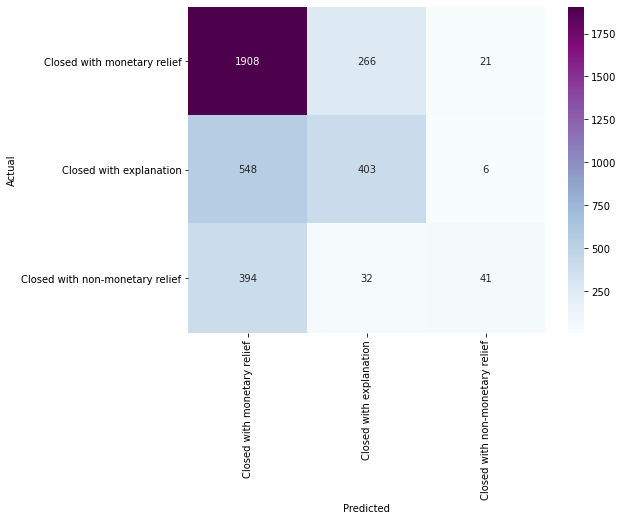

In [39]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df2['Company response to consumer'].unique(),yticklabels=df2['Company response to consumer'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## SVM

In [40]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(xtrain_tfidf,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]})

In [41]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating', estimator=LinearSVC(),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score='warn')

In [42]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 0.1}
0.665009505001896


In [43]:
final_svc = LinearSVC(C=0.1)
final_svc.fit(xtrain_tfidf,y_train)

LinearSVC(C=0.1)

In [44]:
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

LinearSVC(C=0.1)

In [45]:
y_pred_svc = final_svc.predict(xtest_tfidf)
svc_accuracy = metrics.accuracy_score(y_pred_svc, y_test)
print ("SVC > Accuracy: ", svc_accuracy)

SVC > Accuracy:  0.6521138436032053


In [46]:
print(classification_report(y_test, y_pred_svc,target_names=df2['Company response to consumer'].unique()))

                                 precision    recall  f1-score   support

    Closed with monetary relief       0.66      0.89      0.76      2195
        Closed with explanation       0.59      0.40      0.47       957
Closed with non-monetary relief       0.79      0.05      0.09       467

                       accuracy                           0.65      3619
                      macro avg       0.68      0.45      0.44      3619
                   weighted avg       0.66      0.65      0.60      3619



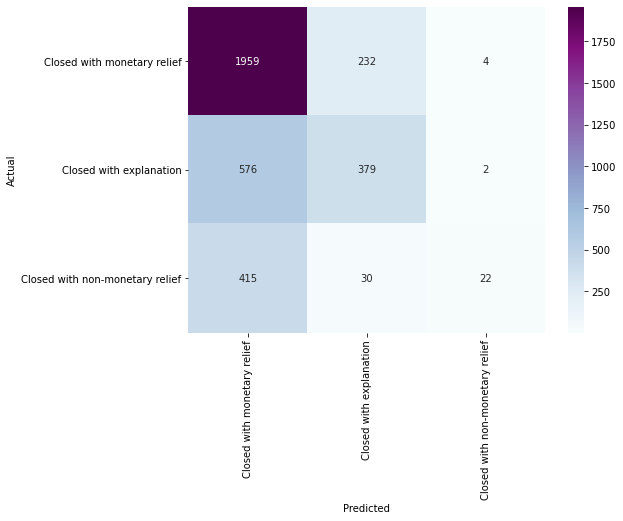

In [47]:
conf_mat = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df2['Company response to consumer'].unique(),yticklabels=df2['Company response to consumer'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## XGBOOST

In [ ]:
#pip install xgboost

In [48]:
import xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3, silent=1, subsample=0.8)
xgb_model.fit(xtrain_tfidf, y_train)

[11:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:14:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=80, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=4,
              reg_lambda=1, scale_pos_weight=None, silent=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
       n_estimators=80, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=4, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=None, colsample_bytree=0.7, eta=0.3, gamma=0,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=80, n_jobs=1, nthread=None, num_parallel_tree=None,
              objective='multi:softprob', random_state=0, reg_alpha=4,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
              subsample=0.8, tree_method=None, validate_parameters=None, ...)

In [50]:
y_pred_xgb = xgb_model.predict(xtest_tfidf)
xgb_accuracy = metrics.accuracy_score(y_pred_xgb, y_test)
print ("XGBoost > Accuracy: ", xgb_accuracy)

XGBoost > Accuracy:  0.6554296767062725


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb,target_names=df2['Company response to consumer'].unique()))

                                 precision    recall  f1-score   support

    Closed with monetary relief       0.67      0.88      0.76      2195
        Closed with explanation       0.60      0.44      0.51       957
Closed with non-monetary relief       0.50      0.06      0.11       467

                       accuracy                           0.66      3619
                      macro avg       0.59      0.46      0.46      3619
                   weighted avg       0.63      0.66      0.61      3619



In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb,target_names=df2['Company response to consumer'].unique()))

                                 precision    recall  f1-score   support

    Closed with monetary relief       0.67      0.88      0.76      2195
        Closed with explanation       0.60      0.44      0.51       957
Closed with non-monetary relief       0.50      0.06      0.11       467

                       accuracy                           0.66      3619
                      macro avg       0.59      0.46      0.46      3619
                   weighted avg       0.63      0.66      0.61      3619



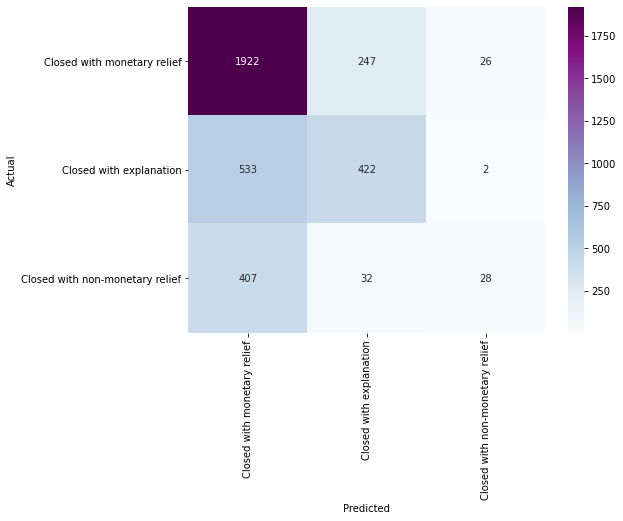

In [53]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_xgb)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df2['Company response to consumer'].unique(),yticklabels=df2['Company response to consumer'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()